This is a fairly complex beginner machine learning problem. One can effectively learn Feature transformation and engineering techniques, Data visualization methods from this problem. I had fun solving this problem. Please provide comments on how to improve this solution. <br>
Thanks. <br>

Submission Acc: 79.5 (Top 15%)


In [1]:

# import statements
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling 

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


# Understand data
First take a statistical glance of data


In [2]:
# read the data
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_x = train_data.loc[:, train_data.columns != "Survived"]
train_y = train_data.loc[:, train_data.columns == "Survived"]
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_x = test_data
full_data = train_x.append(test_x)
print ("full data shape",full_data.shape)
print ("train_x shape",train_x.shape)

full data shape (1309, 11)
train_x shape (891, 11)


In [3]:
full_data[full_data['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
ftest_pid = test_data["PassengerId"]
ftest_pid

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
# import warnings
# warnings.filterwarnings('ignore')
# profile = pandas_profiling.ProfileReport(train_data)
# profile

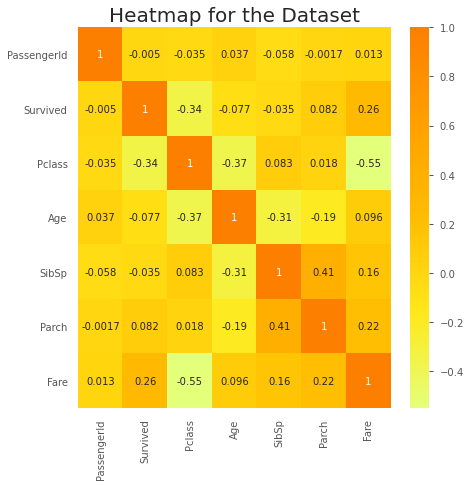

In [9]:
# heat map of features
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

sns.heatmap(train_data.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

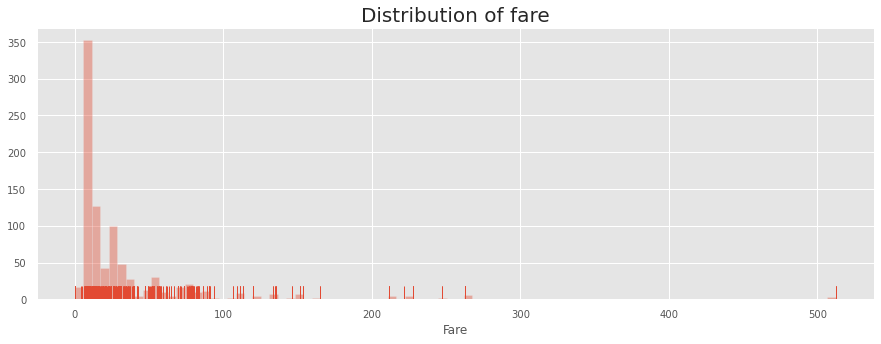

In [10]:
plt.rcParams['figure.figsize'] = (15,5)
sns.distplot(train_data['Fare'], kde=False, rug=True, bins=90)
plt.title('Distribution of fare', fontsize=20)
plt.show()


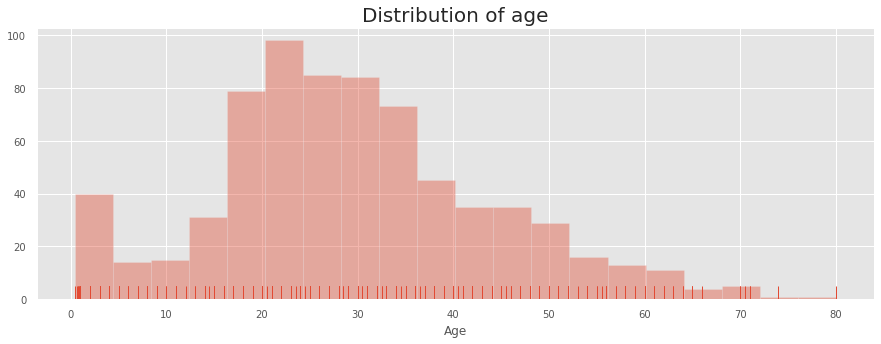

In [11]:
plt.rcParams['figure.figsize'] = (15,5)
sns.distplot(train_data['Age'], kde=False, rug=True)
plt.title('Distribution of age', fontsize=20)
plt.show()

Below boxplot tells us distribution of data with respect to target.

## TODO
do something about very high fares. 

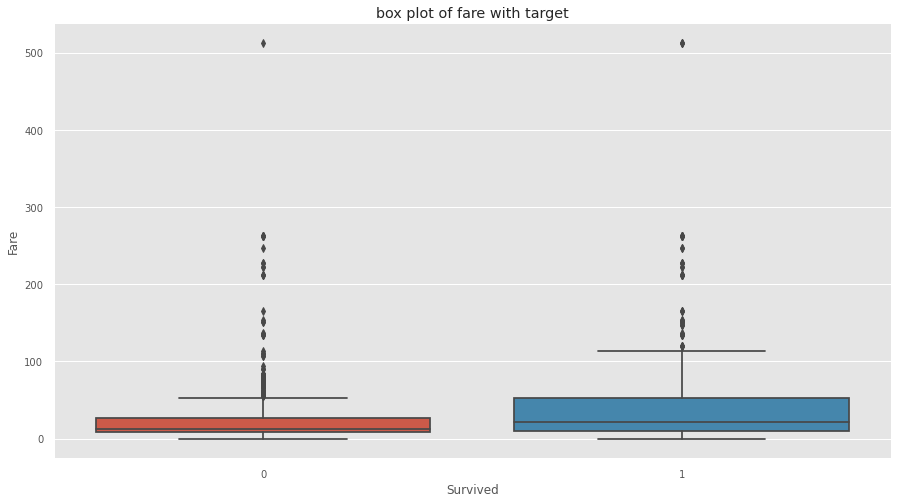

In [12]:
# box plot of fare
plt.rcParams['figure.figsize'] = (15,8)
sns.boxplot(train_data['Survived'], full_data['Fare'])
plt.title('box plot of fare with target')
plt.show()

Above boxplot shows us:
* survived -> paid high fare
* Lot of outliers 

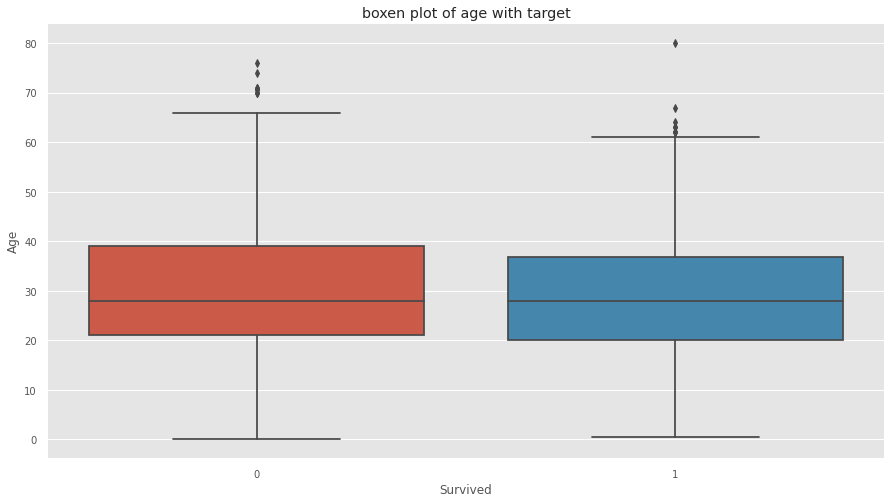

In [13]:
# boxen plot of Age
plt.rcParams['figure.figsize'] = (15,8)
sns.boxplot(train_data['Survived'], full_data['Age'])
plt.title('boxen plot of age with target')
plt.show()

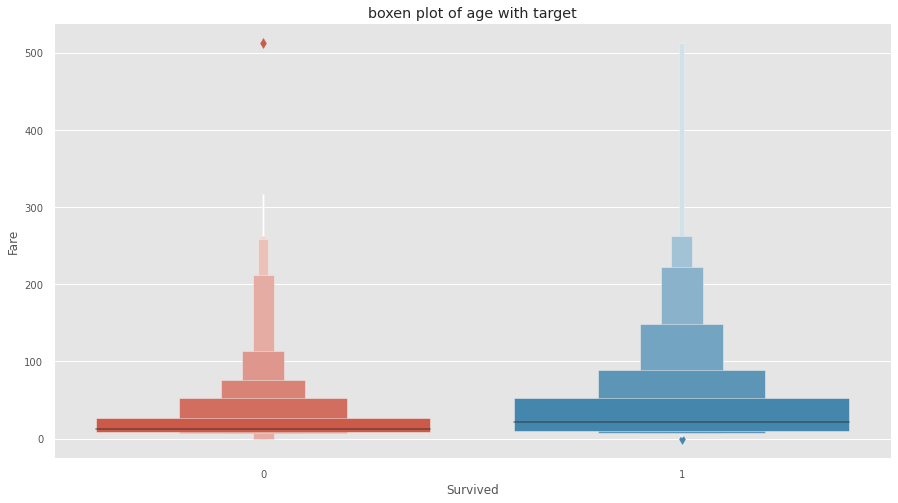

In [14]:
# boxen plot of Age
plt.rcParams['figure.figsize'] = (15,8)
sns.boxenplot(train_data['Survived'], full_data['Fare'])
plt.title('boxen plot of age with target')
plt.show()

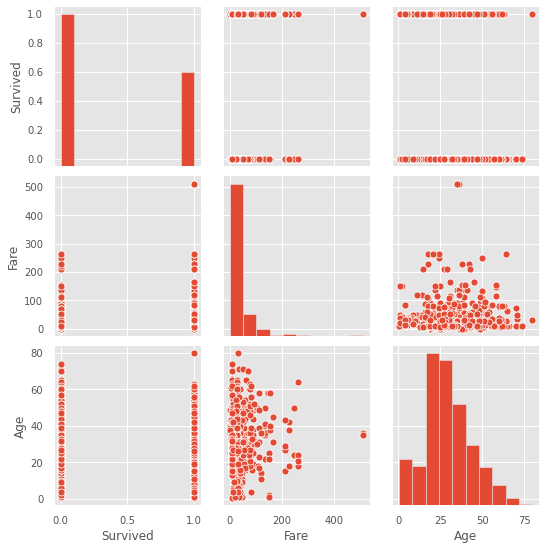

In [15]:
# pair plot of different feature
tmp_df = train_data[['Survived', 'Fare', 'Age']]
sns.pairplot(tmp_df)
plt.show()

 For categorical data, 
 * we can use swarm plot
 * box plots with hue

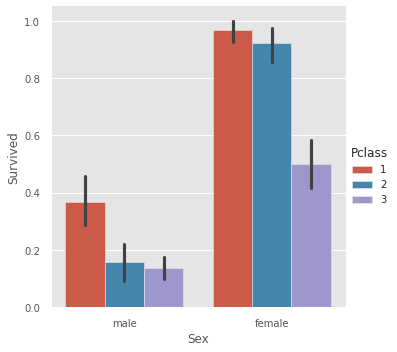

In [16]:

# bar graph with hue
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=train_data)
# sns.catplot(x="Sex", y="Survived", kind="bar", data=train_data)
plt.show()

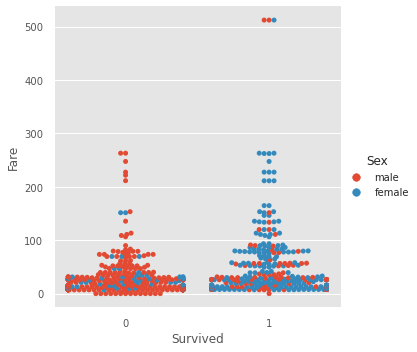

In [17]:
sns.catplot(x="Survived", y="Fare", hue="Sex", kind="swarm", data=train_data)
plt.show()

In [18]:
# sns.relplot(x="SibSp", y="Ticket", hue="Survived", data=train_data)
# plt.show()


In [19]:
full_data.iloc[891:895,:]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


 # Fill the missing data 
Use sklearn.SimpleImputer to fill the missing values with (mean, median, mode) of the data <br>
SimpleImputer: Uses single column values to calculate that column NaN's  <br>
IterativeImputer: Uses entire set of feature dimentions to calculate the missing value. <br>
NOTE: we can also use imputer for categorical (text) based features

In [20]:
# simpleImpute of Age feature
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy='mean')
imp = imp.fit(train_data[["Age"]])
# full_data["Age"] = pd.DataFrame(imp.transform(full_data[["Age"]]))
# test_data["Age"] = pd.DataFrame(imp.transform(test_data[["Age"]]))
# sns.distplot(full_data["Age"], kde=False, rug=True)
# plt.show()
tmp_age = pd.DataFrame(imp.transform(full_data[["Age"]]))
tmp_age = tmp_age.rename(columns={0:"Age"})
full_data.drop(['Age'],axis=1,inplace=True)


In [21]:
full_data.iloc[415:420,:]

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,416,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,0,0,343095,8.05,NaN,S
416,417,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,1,1,28220,32.50,NaN,S
417,418,2,"Silven, Miss. Lyyli Karoliina",female,0,2,250652,13.00,NaN,S
418,419,2,"Matthews, Mr. William John",male,0,0,28228,13.00,NaN,S
419,420,3,"Van Impe, Miss. Catharina",female,0,2,345773,24.15,NaN,S


In [22]:
result = pd.concat([full_data, tmp_age], axis=1, join='inner')


In [23]:
full_data = result
full_data

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,1,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.000000
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.000000
2,3,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.000000
4,5,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.000000
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,8.0500,NaN,S,29.699118
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,108.9000,C105,C,44.000000
415,1307,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,29.699118
416,1308,3,"Ware, Mr. Frederick",male,0,0,359309,8.0500,NaN,S,34.000000


In [24]:
# # IterativeImpute
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# imp = IterativeImputer(max_iter=10, random_state=0)
# imp.fit(train_x[["Age"]])
# tmp_age1 = pd.DataFrame(imp.transform(train_data[["Age"]]))
# tmp_age2 = pd.DataFrame(imp.transform(test_data[["Age"]]))
# sns.distplot(tmp_age1, kde=False, rug=True)
# plt.show()

# Drop any unnessasary columns
useless columns such as name, id, etc. 
These columns doesn't help ML algo in any way.<br>
Here, Parch and Ticket feature has a lot in common. Both 76% filled by single passengers, 14%

In [25]:
full_data=full_data.drop(columns=["PassengerId","Name", "Cabin", "Ticket"])
full_data.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age'], dtype='object')

# Transform cat values in to new features
This transformation enables ml algorithms to better understand the data <br>
From now on use full_data

In [26]:
# using one hot encoder from pandas.get_dummies
onehot_embark = pd.get_dummies(full_data["Embarked"], prefix="Embark")
onehot_pclass = pd.get_dummies(full_data["Pclass"], prefix="Pclass")
# full_data.drop(columns=["Embarked","Pclass"],axis=1,inplace=True)
# full_data = pd.concat([full_data, onehot_embark, onehot_pclass], axis=1,join='inner')
# full_data



In [27]:
result = pd.concat([full_data, onehot_embark, onehot_pclass], axis=1,join='inner')
result

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age,Embark_C,Embark_Q,Embark_S,Pclass_1,Pclass_2,Pclass_3
0,3,male,1,0,7.2500,S,22.000000,0,0,1,0,0,1
1,1,female,1,0,71.2833,C,38.000000,1,0,0,1,0,0
2,3,female,0,0,7.9250,S,26.000000,0,0,1,0,0,1
3,1,female,1,0,53.1000,S,35.000000,0,0,1,1,0,0
4,3,male,0,0,8.0500,S,35.000000,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,0,0,8.0500,S,29.699118,0,0,1,0,0,1
414,1,female,0,0,108.9000,C,44.000000,1,0,0,1,0,0
415,3,male,0,0,7.2500,S,29.699118,0,0,1,0,0,1
416,3,male,0,0,8.0500,S,34.000000,0,0,1,0,0,1


In [28]:
full_data = result.copy()

In [29]:
full_data.drop(columns=["Embarked","Pclass"],axis=1,inplace=True)
full_data

,Sex,SibSp,Parch,Fare,Age,Embark_C,Embark_Q,Embark_S,Pclass_1,Pclass_2,Pclass_3
0,male,1,0,7.2500,22.000000,0,0,1,0,0,1
1,female,1,0,71.2833,38.000000,1,0,0,1,0,0
2,female,0,0,7.9250,26.000000,0,0,1,0,0,1
3,female,1,0,53.1000,35.000000,0,0,1,1,0,0
4,male,0,0,8.0500,35.000000,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,male,0,0,8.0500,29.699118,0,0,1,0,0,1
414,female,0,0,108.9000,44.000000,1,0,0,1,0,0
415,male,0,0,7.2500,29.699118,0,0,1,0,0,1
416,male,0,0,8.0500,34.000000,0,0,1,0,0,1


In [30]:
# modify cat string values of Sex column to int values
full_data.loc[full_data.Sex=="male","Sex"] = 0
full_data.loc[full_data.Sex=="female", "Sex"] = 1
full_data

,Sex,SibSp,Parch,Fare,Age,Embark_C,Embark_Q,Embark_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,7.2500,22.000000,0,0,1,0,0,1
1,1,1,0,71.2833,38.000000,1,0,0,1,0,0
2,1,0,0,7.9250,26.000000,0,0,1,0,0,1
3,1,1,0,53.1000,35.000000,0,0,1,1,0,0
4,0,0,0,8.0500,35.000000,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,0,8.0500,29.699118,0,0,1,0,0,1
414,1,0,0,108.9000,44.000000,1,0,0,1,0,0
415,0,0,0,7.2500,29.699118,0,0,1,0,0,1
416,0,0,0,8.0500,34.000000,0,0,1,0,0,1


# Normalize the data
Normalize all the feature vectors. Here we used standard normalization <br>
If we don't normalize, we get this result
>        Training Accuracy : 0.9839486356340289
        Testing Accuracy : 0.8283582089552238
                      precision    recall  f1-score   support
                    0       0.84      0.89      0.86       164
                   1       0.81      0.73      0.77       104
            accuracy                           0.83       268
           macro avg       0.82      0.81      0.82       268
        weighted avg       0.83      0.83      0.83       268
        
If we normalize, we get following result

>             Training Accuracy : 0.9839486356340289
            Testing Accuracy : 0.8022388059701493
                          precision    recall  f1-score   support
                       0       0.84      0.84      0.84       167
                       1       0.74      0.74      0.74       101
                accuracy                           0.80       268
               macro avg       0.79      0.79      0.79       268
            weighted avg       0.80      0.80      0.80       268

There is lot of overfitting going on. 



In [31]:
tmp_full_data = full_data.copy()
tmp_data = full_data.copy()

In [32]:
#experiment the data; To check new features such as age range, Fare range, (sibsp*parch)->family column.
#experimentation is at the end of this notebook
#Even if something happens to full_data or tmp_full_data. we can simply execute this one cell to start at this point.
exp_full_data = tmp_data.copy() 

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tmp_age = pd.DataFrame(tmp_full_data["Age"][0:891])
full_age_0 = pd.DataFrame(tmp_full_data["Age"][:])
scaler.fit(tmp_age)
full_age_1 = pd.DataFrame(scaler.transform(full_age_0))
full_age_1 = full_age_1.rename(columns={0:"Age"})
full_age_1

,Age
0,-0.592481
1,0.638789
2,-0.284663
3,0.407926
4,0.407926
...,...
1304,0.000000
1305,1.100515
1306,0.000000
1307,0.330972


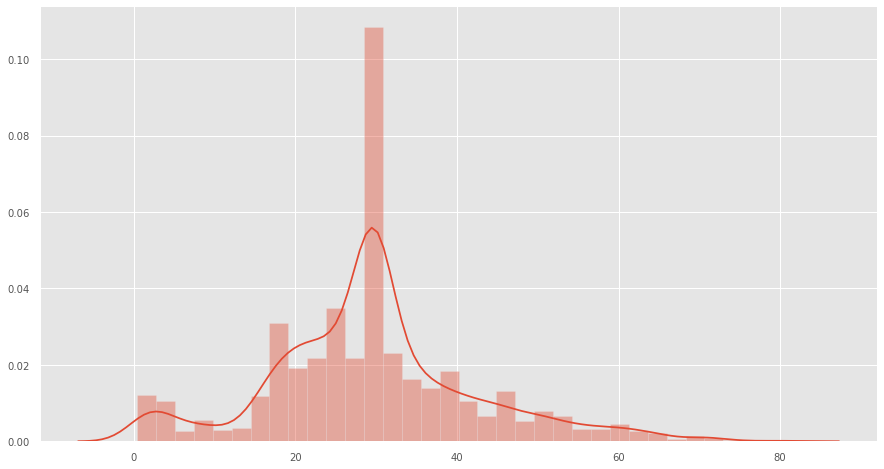

In [34]:
sns.distplot(full_age_0)
plt.show()

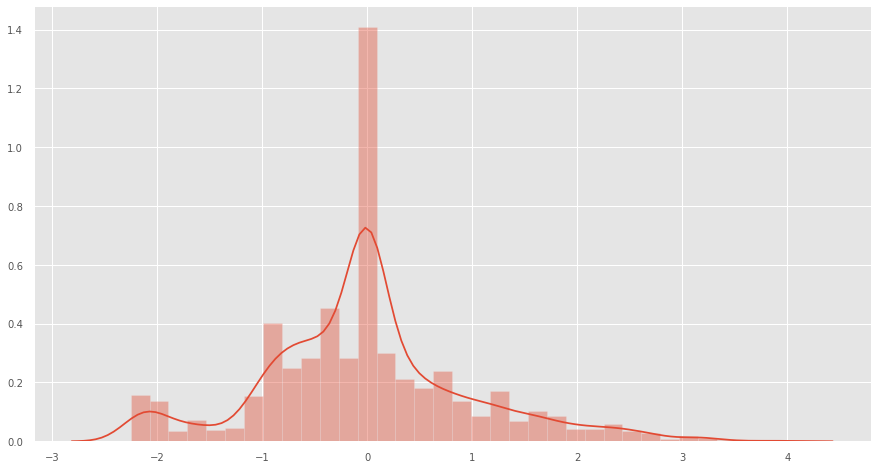

In [35]:
sns.distplot(full_age_1)
plt.show()

In [36]:
full_data.drop(columns=["Age"], axis=1, inplace=True)
full_data

,Sex,SibSp,Parch,Fare,Embark_C,Embark_Q,Embark_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,7.2500,0,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,0
2,1,0,0,7.9250,0,0,1,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,0
4,0,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,0,0,0,8.0500,0,0,1,0,0,1
414,1,0,0,108.9000,1,0,0,1,0,0
415,0,0,0,7.2500,0,0,1,0,0,1
416,0,0,0,8.0500,0,0,1,0,0,1


In [37]:
full_data = pd.concat([full_data, full_age_1], axis=1, join="inner")
full_data

,Sex,SibSp,Parch,Fare,Embark_C,Embark_Q,Embark_S,Pclass_1,Pclass_2,Pclass_3,Age
0,0,1,0,7.2500,0,0,1,0,0,1,-0.592481
1,1,1,0,71.2833,1,0,0,1,0,0,0.638789
2,1,0,0,7.9250,0,0,1,0,0,1,-0.284663
3,1,1,0,53.1000,0,0,1,1,0,0,0.407926
4,0,0,0,8.0500,0,0,1,0,0,1,0.407926
...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,0,8.0500,0,0,1,0,0,1,0.000000
414,1,0,0,108.9000,1,0,0,1,0,0,1.100515
415,0,0,0,7.2500,0,0,1,0,0,1,0.000000
416,0,0,0,8.0500,0,0,1,0,0,1,0.330972


In [38]:
tmp_full_data = full_data.copy()

In [39]:
scaler = StandardScaler()
tmp_fare = pd.DataFrame(tmp_full_data[["Fare","SibSp","Parch"]][0:891])
tmp_fare
full_fare_0 = pd.DataFrame(tmp_full_data[["Fare","SibSp","Parch"]][:])
scaler.fit(tmp_fare)
full_fare_1 = pd.DataFrame(scaler.transform(full_fare_0))
full_fare_1 = full_fare_1.rename(columns={0:"Fare",1:"SibSp",2:"Parch"})
full_fare_1

,Fare,SibSp,Parch
0,-0.502445,0.432793,-0.473674
1,0.786845,0.432793,-0.473674
2,-0.488854,-0.474545,-0.473674
3,0.420730,0.432793,-0.473674
4,-0.486337,-0.474545,-0.473674
...,...,...,...
1304,-0.486337,-0.474545,-0.473674
1305,1.544246,-0.474545,-0.473674
1306,-0.502445,-0.474545,-0.473674
1307,-0.486337,-0.474545,-0.473674


In [40]:
full_data.drop(columns=["Fare","SibSp","Parch"], axis=1, inplace=True)
full_data = pd.concat([full_data, full_fare_1], axis=1, join="inner")
full_data

,Sex,Embark_C,Embark_Q,Embark_S,Pclass_1,Pclass_2,Pclass_3,Age,Fare,SibSp,Parch
0,0,0,0,1,0,0,1,-0.592481,-0.502445,0.432793,-0.473674
1,1,1,0,0,1,0,0,0.638789,0.786845,0.432793,-0.473674
2,1,0,0,1,0,0,1,-0.284663,-0.488854,-0.474545,-0.473674
3,1,0,0,1,1,0,0,0.407926,0.420730,0.432793,-0.473674
4,0,0,0,1,0,0,1,0.407926,-0.486337,-0.474545,-0.473674
...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,0,1,0,0,1,0.000000,-0.648422,-0.474545,-0.473674
414,1,1,0,0,1,0,0,1.100515,-0.488854,-0.474545,-0.473674
415,0,0,0,1,0,0,1,0.000000,-0.486337,-0.474545,-0.473674
416,0,0,0,1,0,0,1,0.330972,0.005956,0.432793,0.767630


In [41]:
full_data_copy = full_data.copy()
full_data.describe()

,Embark_C,Embark_Q,Embark_S,Pclass_1,Pclass_2,Pclass_3,Age,Fare,SibSp,Parch
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.206264,0.093965,0.698243,0.246753,0.211612,0.541635,-0.020074,0.002040,0.020367,-0.001428
std,0.404777,0.291891,0.459196,0.431287,0.408607,0.498454,0.992549,0.997843,1.032133,0.987940
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.253155,-0.648422,-0.474545,-0.473674
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.592481,-0.488854,-0.474545,-0.473674
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-0.357391,-0.474545,-0.473674
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.407926,-0.024246,0.432793,-0.473674
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.870872,9.667167,6.784163,6.974147


# split the data in to train, validation, test set
Out of all the train data split it into 60%train, 20%test, 20%test. <br>
but here we dont have much train data and it's my first practise. so Train-> 70%train, 30%Test.

In [42]:
from sklearn.model_selection import train_test_split
#following is the final test
x_ftest = full_data.iloc[891:,:]
print ("shape of x_ftest",x_ftest.shape)
# (418,11)
xdf = pd.DataFrame(full_data.iloc[:891,:])
ydf = train_y
x_train,x_test,y_train, y_test = train_test_split(xdf,ydf,test_size=0.25,random_state=None)
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

shape of x_ftest (418, 11)
Shape of x_train : (668, 11)
Shape of x_test : (223, 11)
Shape of y_train : (668, 1)
Shape of y_test : (223, 1)


# Modelling 
Here we need to try out different ML models and analyze their performance.


In [43]:
# Random forests is well known for classification problems.
# But it is suffering from overfitting. Submission acc is 73.2%
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

# model = RandomForestClassifier(n_estimators=100)
# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)

# # evaluating the model
# print("Training Accuracy :", model.score(x_train, y_train))
# print("Testing Accuracy :", model.score(x_test, y_test))

# # cofusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.rcParams['figure.figsize'] = (5, 5)
# sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# # classification report
# cr = classification_report(y_test, y_pred)
# print(cr)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy : 0.8008982035928144
Testing Accuracy : 0.8116591928251121
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       140
           1       0.75      0.75      0.75        83

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



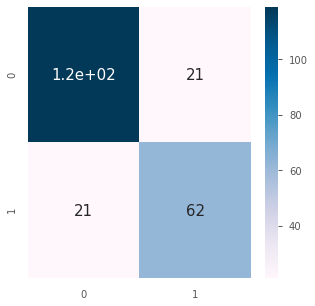

In [44]:
# random forest algorithm is overfitting. So, lets use logistic regression with regularization.
# final subimission accuracy of this model is 79.4%
# but lets try using SVM
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
model = LogisticRegression(random_state=0).fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_quant = model.predict_proba(x_test)[:, 1]
# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

In [45]:
# # submission acc is 75.5% 
# from sklearn import svm
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# model = svm.SVC(kernel='linear')
# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)
# # evaluating the model
# print("Training Accuracy :", model.score(x_train, y_train))
# print("Testing Accuracy :", model.score(x_test, y_test))

# # cofusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.rcParams['figure.figsize'] = (5, 5)
# sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# # classification report
# cr = classification_report(y_test, y_pred)
# print(cr)

In [46]:
# y_fpred = pd.DataFrame(model.predict(x_ftest))
# y_fpred = y_fpred.rename(columns={0:"Survived"})
# print (y_fpred)
# fresult = pd.concat([ftest_pid, y_fpred],axis=1,join='inner')
# print (fresult)
# fresult.to_csv("result_with_norm_svm.csv", index=False)

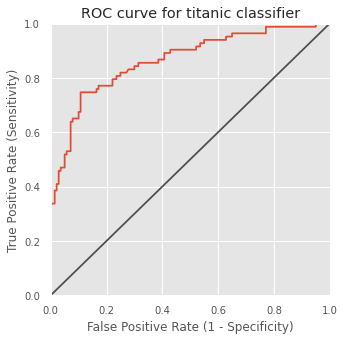

In [47]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for titanic classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [48]:
from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)

AUC Score : 0.8646729776247849


In [49]:
# Learn this


# importing ML Explanability Libraries
#for purmutation importance
import eli5 
from eli5.sklearn import PermutationImportance

#for SHAP values
import shap 
from pdpbox import pdp, info_plots #for partial plots

# let's check the importance of each attributes

perm = PermutationImportance(model, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


Weight,Feature
0.2269 ± 0.0552,Sex
0.0377 ± 0.0193,Age
0.0126 ± 0.0105,Pclass_1
0.0117 ± 0.0231,Pclass_3
0.0054 ± 0.0088,SibSp
0.0054 ± 0.0154,Embark_S
0.0018 ± 0.0072,Parch
0.0009 ± 0.0105,Fare
-0.0009 ± 0.0036,Embark_Q
-0.0018 ± 0.0044,Pclass_2


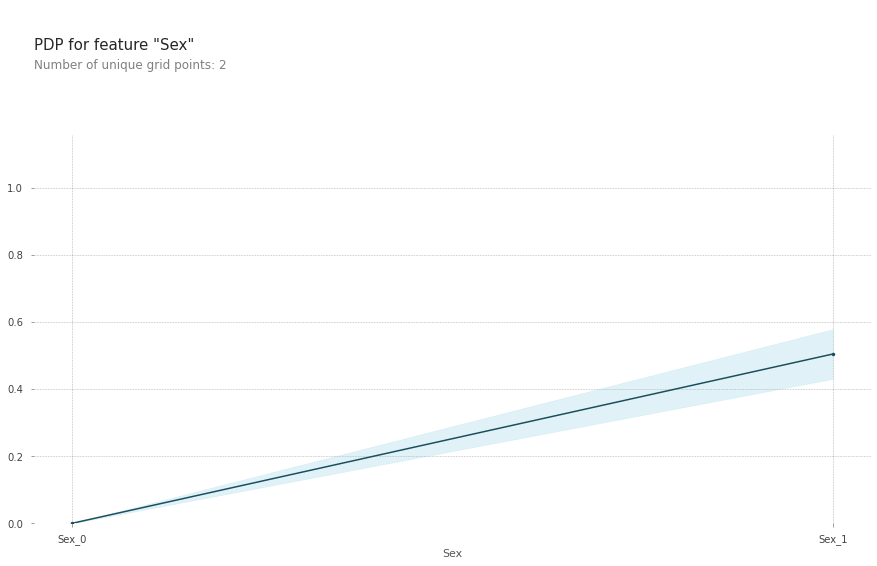

In [50]:
# plotting the partial dependence plot for num_major_vessels

base_features = full_data.columns.values.tolist()

feat_name = 'Sex'
pdp_dist = pdp.pdp_isolate(model=model, dataset=x_test, model_features = base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

## Experimentation in feature engineering, feature transformation
1. Turning continuous numerical features into bins and then bins into ordinal features <br>
    Age -> bins <br>
    Fare -> bins <br>
    When should we do this? How do we know converted bins works better than continuous values. <br>
   
   
2. A new Feature creation from original features. <br>
    Name -> Titles <br>
    Because there is a strong correlation of Name titles to survival <br>
    (Parch + sibsp) -> Family_size ??<br>
    Family_size ==1 -> alone ??<br>
    
    
3. Fill missing values of Age.<br>
    Instead of taking mean of all the train records. There is a correlation "age" and "pclass x sex" <br>
    Take => (pclass 1 x male) age mean and fill the missing records of pclass1 and male <br>
    
4. 
   


In [51]:
exp_full_data.describe()

,SibSp,Parch,Fare,Age,Embark_C,Embark_Q,Embark_S,Pclass_1,Pclass_2,Pclass_3
count,1309.000000,1309.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.498854,0.385027,33.295479,29.438266,0.206264,0.093965,0.698243,0.246753,0.211612,0.541635
std,1.041658,0.865560,51.758668,12.897896,0.404777,0.291891,0.459196,0.431287,0.408607,0.498454
min,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.895800,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,14.454200,29.699118,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,31.275000,35.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,8.000000,9.000000,512.329200,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


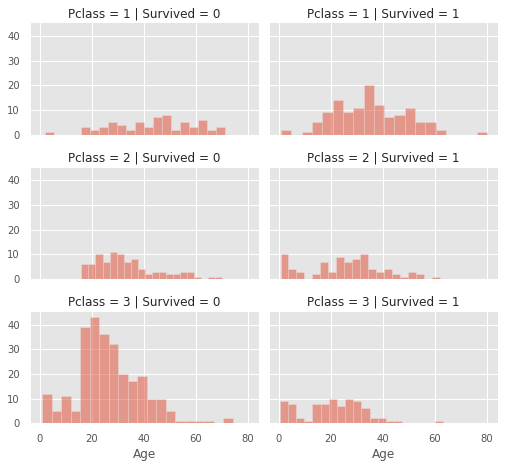

In [52]:
# understand how to use this method of graph
# this is for continuous variables.
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

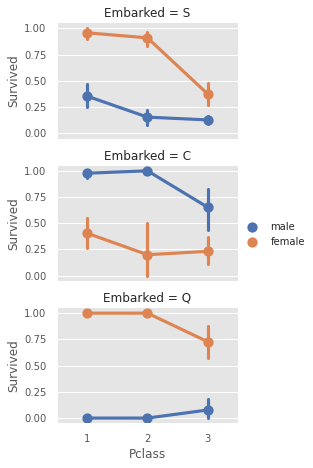

In [53]:
# this is for categorical values
grid = sns.FacetGrid(train_data, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()